# [Dates and Times in Python](https://www.datacamp.com/completed/statement-of-accomplishment/course/45ab03ad3d2e69db921bba1ddac9993f10b38524)

**Contents:**
  * [Dates](#dates)
  * [Dates and Times](#dates-and-times)
  * [Timezones and Daylight Savings](#timezones-and-daylight-savings)
  * [Pandas](#pandas)

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from datetime import date, datetime, timedelta, timezone
from dateutil import tz
from typing import List

pd.set_option("display.max_columns", None)
pd.set_option("display.width", np.iinfo(np.int32).max)

# load data
florida_hurricane_dates: List[date] = pd.read_pickle('florida_hurricane_dates.pkl')
onebike_datetimes = pd.read_csv(
  'onebike_datetimes.csv',
  parse_dates=['Start date', 'End date'],
  date_format="%Y-%m-%d %H:%M:%S",
)

# additional data
duration = onebike_datetimes["End date"] - onebike_datetimes["Start date"]
onebike_datetimes["Duration"] = duration.dt.total_seconds()

In [2]:
print(pd.Series(florida_hurricane_dates).head())  # unordered

0    1988-08-04
1    1990-10-12
2    2003-04-20
3    1971-09-01
4    1988-08-23
dtype: object


In [3]:
print(onebike_datetimes.head())

           Start date            End date  Start station number                         Start station  End station number                           End station Bike number Member type  Duration
0 2017-10-01 15:23:25 2017-10-01 15:26:26                 31038                  Glebe Rd & 11th St N               31036         George Mason Dr & Wilson Blvd      W20529      Member     181.0
1 2017-10-01 15:42:57 2017-10-01 17:49:59                 31036         George Mason Dr & Wilson Blvd               31036         George Mason Dr & Wilson Blvd      W20529      Casual    7622.0
2 2017-10-02 06:37:10 2017-10-02 06:42:53                 31036         George Mason Dr & Wilson Blvd               31037  Ballston Metro / N Stuart & 9th St N      W20529      Member     343.0
3 2017-10-02 08:56:45 2017-10-02 09:18:03                 31037  Ballston Metro / N Stuart & 9th St N               31295                     Potomac & M St NW      W20529      Member    1278.0
4 2017-10-02 18:23:48 2017-10-

## Dates

In [4]:
# create a date
andrew = date(1992, 8, 24)

# get the day of the week (Monday is 0)
weekday = andrew.weekday()

# get the month (January is 1)
month = andrew.month

# get the delta between two dates
start = date(2007, 5, 9)
end = date(2007, 12, 13)
delta_days = (end - start).days  # 218

# sort a list of dates
hurricanes_sorted = sorted(florida_hurricane_dates)

# dates are compared by value not reference (i.e., they can be different instances)
andrew = hurricanes_sorted[hurricanes_sorted.index(date(1992, 8, 24))]

# format using `strftime`
print(andrew.strftime("%Y-%m-%d"))

1992-08-24


## Dates and Times

In [5]:
trip_counts = {"AM": 0, "PM": 0}

# AM trips start before noon
for _, row in onebike_datetimes.iterrows():
    if row["Start date"].hour < 12:
        trip_counts["AM"] += 1
    else:
        trip_counts["PM"] += 1

print(trip_counts)

{'AM': 94, 'PM': 196}


In [6]:
first_start = onebike_datetimes["Start date"].iloc[0]
fmt = "%Y-%m-%dT%H:%M:%S"  # ISO 8601 format

print(first_start.isoformat())
print(first_start.strftime(fmt))  # same

2017-10-01T15:23:25
2017-10-01T15:23:25


In [7]:
# convert unix timestamps to datetimes
timestamps = [1514665153, 1514664543]
dts = []

for ts in timestamps:
    dts.append(datetime.fromtimestamp(ts))

print(dts)

[datetime.datetime(2017, 12, 30, 15, 19, 13), datetime.datetime(2017, 12, 30, 15, 9, 3)]


In [8]:
onebike_durations = []

# get total seconds
for _, row in onebike_datetimes.iterrows():
    trip_duration = row["End date"] - row["Start date"]
    trip_length_seconds = trip_duration.total_seconds()
    onebike_durations.append(trip_length_seconds)

print(onebike_durations[:5])

[181.0, 7622.0, 343.0, 1278.0, 1277.0]


In [9]:
total_elapsed_time = sum(onebike_durations)
number_of_trips = len(onebike_durations)

# print the average trip time
print(total_elapsed_time / number_of_trips)

1178.9310344827586


In [10]:
# calculate shortest and longest trips
shortest_trip = min(onebike_durations)
longest_trip = max(onebike_durations)

# note the negative trip right before "fall back" daylight savings time
print(f"The shortest trip was {shortest_trip} seconds")
print(f"The longest trip was {longest_trip} seconds")

The shortest trip was -3346.0 seconds
The longest trip was 76913.0 seconds


## Timezones and Daylight Savings

[Sir Sandford Fleming](https://en.wikipedia.org/wiki/Sandford_Fleming#Inventor_of_worldwide_standard_time) invented "Standard Time" in 1879. He proposed dividing the world into 24 time zones, each 15 degrees of longitude wide, because the Earth rotates 360 degrees in 24 hours (360/24 = 15).

Time zones are centered on _meridians of longitude_ (imaginary lines running from the North Pole to the South Pole) that are multiples of 15 degrees.

The time zones are numbered from 0 to 23, starting at the Prime Meridian (longitude 0 degrees) and increasing to the west. The time zone for the Prime Meridian is called Greenwich Mean Time (GMT) or Coordinated Universal Time (UTC). The time zone for the meridian 15 degrees west of the Prime Meridian is called UTC-1, and the time zone for the meridian 15 degrees east of the Prime Meridian is called UTC+1.

Daylight Savings Time (DST) is a more modern invention aimed at saving energy. The concept is to move an hour of daylight from the morning to the evening, reducing the need for artificial lighting and overall energy consumption.

DST is not practiced in every country and the rules for when DST starts and ends are also not consistent across countries. The energy savings benefit of DST is not universally accepted, and some studies have shown it can negatively impact health by disrupting circadian rhythms.

DST is not even consistent within regions of countries that do practice it. For example, the largest Native American reservation is the Navajo Nation. It covers parts of Utah, New Mexico, and Arizona. Arizona does not observe DST, but the Navajo Nation does. The Hopi Nation, which is entirely surrounded by the Navajo Nation, does not observe DST. You can change time zones multiple times just by driving across northeastern Arizona.

Managing time zones is crucial in software engineering because it determines how data is stored and displayed to users around the globe. In the context of Data Science, incorrectly handling time zones can lead to incorrect conclusions about your data. DST further complicates this by introducing variability into the time zone rules.

Starting with [Python 3.9](https://peps.python.org/pep-0615), the `zoneinfo` module uses the system's [IANA time zone database](https://en.wikipedia.org/wiki/Tz_database) (aka the Olson database) and provides a fall-back mechanism (downloading from PyPI) when it isn't available. This module essentially allows you to attach a time zone to a `datetime` object.

In [11]:
# PST/UTC-8 timezone object
pst = timezone(timedelta(hours=-8))

# AEDT/UTC+11 timezone object
aedt = timezone(timedelta(hours=11))

# october 1, 2017 at 3:26:26 PM UTC
dt = datetime(2017, 10, 1, 15, 26, 26, tzinfo=timezone.utc)

# october 1, 2017 at 3:26:26 PM UTC-8
dt = datetime(2017, 10, 1, 15, 26, 26, tzinfo=pst)

# october 1, 2017 at 3:26:26 PM UTC+11
dt = datetime(2017, 10, 1, 15, 26, 26, tzinfo=aedt)

# timezone object
edt = timezone(timedelta(hours=-4))

for _, row in onebike_datetimes[:5].iterrows():
    row["Start date"] = row["Start date"].replace(tzinfo=edt)
    dt = row["Start date"].astimezone(timezone.utc)
    print(f"Original: {row['Start date']} | UTC: {dt.isoformat()}")

Original: 2017-10-01 15:23:25-04:00 | UTC: 2017-10-01T19:23:25+00:00
Original: 2017-10-01 15:42:57-04:00 | UTC: 2017-10-01T19:42:57+00:00
Original: 2017-10-02 06:37:10-04:00 | UTC: 2017-10-02T10:37:10+00:00
Original: 2017-10-02 08:56:45-04:00 | UTC: 2017-10-02T12:56:45+00:00
Original: 2017-10-02 18:23:48-04:00 | UTC: 2017-10-02T22:23:48+00:00


In [12]:
# get timezones by name
et = tz.gettz("America/New_York")
uk = tz.gettz("Europe/London")
ist = tz.gettz("Asia/Kolkata")
sm = tz.gettz("Pacific/Apia")

# need to convert to Python datetime object
local = onebike_datetimes["Start date"].iloc[0].to_pydatetime()

print(local.isoformat())
print(local.astimezone(et).isoformat())
print(local.astimezone(uk).isoformat())
print(local.astimezone(ist).isoformat())
print(local.astimezone(sm).isoformat())

2017-10-01T15:23:25
2017-10-01T15:23:25-04:00
2017-10-01T20:23:25+01:00
2017-10-02T00:53:25+05:30
2017-10-02T09:23:25+14:00


In [13]:
start = datetime(2017, 3, 12, tzinfo=tz.gettz("America/New_York"))
end = start + timedelta(hours=6)

# clock time shows 6 hours elapsed because of daylight savings "spring forward"
print((end - start).total_seconds() / (60 * 60))

# convert to UTC to see that actually only 5 hours elapsed
print((end.astimezone(timezone.utc) - start.astimezone(timezone.utc)).total_seconds() / (60 * 60))

6.0
5.0


### Ambiguous Times

Times are _ambiguous_ if they occur twice in the same day. This happens when the clocks are set back 1 hour every fall("fall back").

[PEP-495](https://peps.python.org/pep-0495) added the `fold` attribute to `datetime` objects to handle this.

The `tz.enfold()` method sets the `fold` attribute to `1`, so the time _after the fold_ is used in calculations. In Python 3.6 and later, you can also manually set `dt.fold = 1`.

The term comes from the idea of creating a "fold" in time when clocks are moved back, and a "gap" in time when clocks are moved forward.

In [14]:
for i, row in onebike_datetimes.iterrows():
    # rides with ambiguous start times
    start = row["Start date"].replace(tzinfo=tz.gettz("America/New_York"))
    if tz.datetime_ambiguous(start):
        print(f"Ambiguous start at {start}")

    # rides with ambiguous end times
    end = row["End date"].replace(tzinfo=tz.gettz("America/New_York"))
    if tz.datetime_ambiguous(end):
        print(f"Ambiguous end at {end}")

Ambiguous start at 2017-11-05 01:56:50-04:00
Ambiguous end at 2017-11-05 01:01:04-04:00


In [15]:
trip_durations = []

for _, row in onebike_datetimes.iterrows():
    # equivalent to `row["Column"].dt.tz_localize("America/New_York")`
    start = row["Start date"].replace(tzinfo=tz.gettz("America/New_York"))
    end = row["End date"].replace(tzinfo=tz.gettz("America/New_York"))

    # When the start is later than the end, set the fold to be 1
    if start > end:
        end = tz.enfold(end)

    # Convert to UTC
    start = start.astimezone(timezone.utc)
    end = end.astimezone(timezone.utc)

    # Subtract the difference
    trip_length_seconds = (end - start).total_seconds()
    trip_durations.append(trip_length_seconds)

# Take the shortest trip duration
print("Shortest trip: " + str(min(trip_durations)))

Shortest trip: 116.0


## Pandas

In [16]:
mean = onebike_datetimes["Duration"].mean()
sum = onebike_datetimes["Duration"].sum()

# percent of time the bike was in use (duration over 91 days)
usage_pct = (sum / timedelta(days=91).total_seconds()) * 100

# count by member type
members = onebike_datetimes["Member type"].value_counts()

# percent of rides by member
rides_pct = (members / len(onebike_datetimes)) * 100
print(rides_pct)

Member type
Member    81.37931
Casual    18.62069
Name: count, dtype: float64


In [17]:
joyrides = onebike_datetimes["Start station"] == onebike_datetimes["End station"]

# Total number of joyrides
print(f"{joyrides.sum()} rides were joyrides")

# Median of all rides
print(f"The median duration overall was {onebike_datetimes['Duration'].median():.2f} seconds")

# Median of joyrides
print(
    f"The median duration for joyrides was {onebike_datetimes[joyrides]['Duration'].median():.2f} seconds"
)

6 rides were joyrides
The median duration overall was 660.00 seconds
The median duration for joyrides was 2642.50 seconds


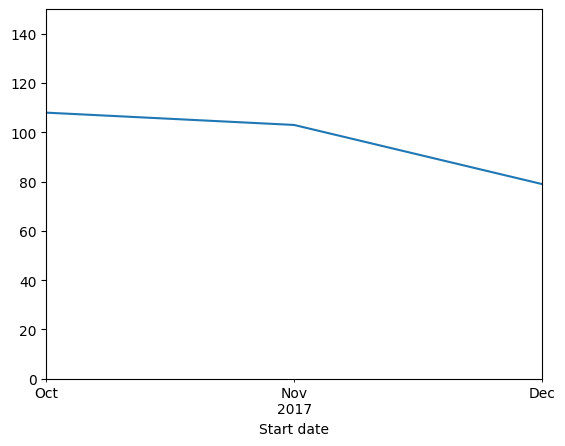

In [18]:
# resample by month and plot
onebike_datetimes.resample("M", on="Start date").size().plot(ylim=[0, 150])
plt.show()

In [19]:
rides = onebike_datetimes.copy()

# set ambiguous times to NaT
rides["Start date"] = rides["Start date"].dt.tz_localize("America/New_York", ambiguous="NaT")
rides["End date"] = rides["End date"].dt.tz_localize("America/New_York", ambiguous="NaT")

# convert to "Europe/London"
rides["Start date"] = rides["Start date"].dt.tz_convert("Europe/London")
rides["End date"] = rides["End date"].dt.tz_convert("Europe/London")

print(rides["Start date"].iloc[0])
print(rides["End date"].iloc[0])

2017-10-01 20:23:25+01:00
2017-10-01 20:26:26+01:00


In [20]:
# add a column for the weekday of the start of the ride
rides["Ride start weekday"] = rides["Start date"].dt.day_name()
print(rides.groupby("Ride start weekday")["Duration"].median())

Ride start weekday
Friday       684.0
Monday       922.5
Saturday     610.0
Sunday       625.0
Thursday     659.0
Tuesday      644.0
Wednesday    629.0
Name: Duration, dtype: float64


In [21]:
# shift the index of the end date up one; then subtract it from the start date
rides["Time since"] = rides["Start date"] - rides["End date"].shift(1)

# convert the results to seconds
rides["Time since"] = rides["Time since"].dt.total_seconds()

# resample by month
monthly = rides.resample("M", on="Start date")

# print the average hours between rides each month
print(monthly["Time since"].mean() / 3600)

Start date
2017-10-31 00:00:00+00:00    5.519242
2017-11-30 00:00:00+00:00    7.256474
2017-12-31 00:00:00+00:00    9.202380
Name: Time since, dtype: float64
